### LAB 11 - KERAS
Name: Anh Kieu  
Class: CSCI 349 - Intro to Data Mining  
Lab 10 - Classification  
Semester: Spring 2021  
Instructor: Brian King  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Input, Model
from keras.layers.core import Dense, Activation

#### 1) Prepreocessed iris dataset from seaborn

In [3]:
df_iris = sns.load_dataset('iris')

In [4]:
df_iris.species = pd.Categorical(df_iris.species)

In [5]:
X = df_iris.iloc[:, 0:-1]
y = df_iris.iloc[:, [-1]]

In [6]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [7]:
y.head(2)

,species
0,setosa
1,setosa


In [8]:
from scipy.stats import zscore
X = X.apply(zscore)

In [9]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444


#### 2) Shuffle your data in your data frames. Use <code>shuffle</code> from <code>sklearn.utils</code>.

In [10]:
from sklearn.utils import shuffle

<code>shuffle</code>: Shuffle arrays or sparse matrices in a consistent way.

In [11]:
X, y = shuffle(X, y, random_state = 0)

In [12]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
114,-0.052506,-0.592373,0.762758,1.580464
62,0.189830,-1.973554,0.137547,-0.262387


In [13]:
y.head(2)

,species
114,virginica
62,versicolor


#### 3) Use <code>train_test_split</code> to split your data, using a 50/50 split, initialize with random state 0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [15]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (75, 4)
X_test: (75, 4)
y_train: (75, 1)
y_test: (75, 1)


#### 4) How many inputs will your network need to have?

There are 4 variables, and thus we will have 4 inputs, namely, <code>sepal_length</code>, <code>sepal_width</code>,<code>petal_length</code>,<code>petal_width</code>

#### 5) How do you represent a multiclass target variable in a model like neural net? For the iris dataset, what will the final layer of your neural net look like?

You represents each class in the target variable with an output node in the last layer (output layer). For iris, we will have 3 nodes representing classes <code>setosa</code>, <code>versicolor</code> and <code>virginica</code>.  
However, since they are categorical, and we want to a function f(parameters) -> output, which is presumably mapping in the real number field, we need to encode categorical variable somehow. We cannot just naively assign ordinal values to these classes (i.e 0 - setosa, 1 - versicolor, 2 - virginica) as they are not correlated in such a way. Thus we need to binarize these values.  
Hence, the iris dataset's final layer in neural network will be represented as a 3 dim vectors, with each node as 1 dimension of the vector.

#### 6) Write the code to convert the iris target variables to a set of binarized variables derived from target variable

In [16]:
y_train = pd.get_dummies(y_train)

In [17]:
y_train.head(2)

,species_setosa,species_versicolor,species_virginica
107,0,0,1
47,1,0,0


In [18]:
y_test = pd.get_dummies(y_test)

In [19]:
y_test.head(2)

,species_setosa,species_versicolor,species_virginica
118,0,0,1
101,0,0,1


#### 7) [P] Create your input node using Input.

In [20]:
inputs = Input(shape = (4,))

#### 8) [P] Add the hidden layer(s), and specify the input as you move along that each layer should receive.

In [21]:
# Set my first hidden layer to 12 units, sigmoid activation
layer = Dense(12, activation='sigmoid')
# Connect my inputs
layer = layer(inputs)

#### 9) [P] Add one more Dense layer representing the output layer. Be sure to specify the correct number of outputs. Use a 'softmax' activation here. Be sure to connect the previous layer.

In [22]:
outputs = Dense(3, activation = 'softmax')
outputs = outputs(layer)

#### 10) [P] Create an instance of Model. Specify the inputs, the outputs, and name the model "simple_iris_model". Then, report a summary of your model using the summary() function.

In [23]:
simple_iris_model = Model(inputs = inputs, outputs = outputs, name = "simple_iris_model")

In [24]:
simple_iris_model.summary()

Model: "simple_iris_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 39        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


#### 11) [P] Compile your model.

Parameters:  
    - optimizers: SGD is standard, adam is commonly used for deep learning  
    - loss function: gives the error for backprogagate   
    - performance metrics  

simple_iris_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### 12) Train your model

In [26]:
history = simple_iris_model.fit(X_train, y_train, batch_size = 1, verbose = 1, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
75/75 [==============================] - 0s 3ms/step - loss: 0.9709 - accuracy: 0.6133 - val_loss: 0.9212 - val_accuracy: 0.5867
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 0.8760 - accuracy: 0.6267 - val_loss: 0.8631 - val_accuracy: 0.6800
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 0.8053 - accuracy: 0.7733 - val_loss: 0.8131 - val_accuracy: 0.7600
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7465 - accuracy: 0.9200 - val_loss: 0.7653 - val_accuracy: 0.8000
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.9333 - val_loss: 0.7235 - val_accuracy: 0.8267
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.9200 - val_loss: 0.6811 - val_accuracy: 0.8267
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.9333 - val_loss: 0.6555 - val_accuracy: 0.8267
Epoch 8/100
7

#### 13) Graphs of training results

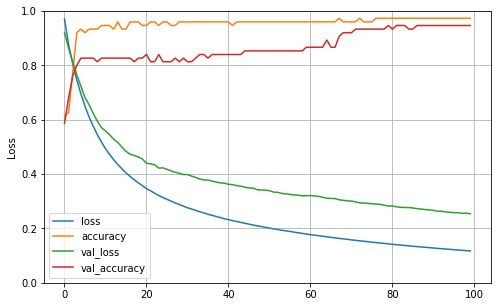

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5),grid=True,ylim=(0,1),ylabel="Loss")
plt.show()

#### 14) Plot model

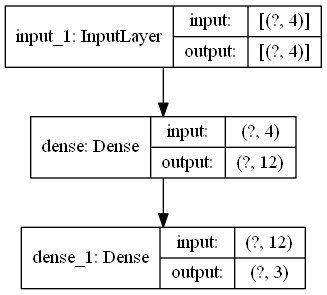

In [28]:
from keras.utils import plot_model
plot_model(simple_iris_model, show_shapes=True)

#### 15) Change parameters

In [49]:
inputs = Input(shape=(4,))
layer = Dense(9, activation= 'sigmoid')(inputs)
outputs = Dense(3,activation="softmax")(layer)
model = Model(inputs=inputs, outputs=outputs, name="simple_iris_model_2")

In [50]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [51]:
history2 = model.fit(X_train, y_train, batch_size = 1, verbose = 1, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
75/75 [==============================] - 0s 3ms/step - loss: 1.0162 - accuracy: 0.3867 - val_loss: 0.9747 - val_accuracy: 0.4800
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 0.9147 - accuracy: 0.5867 - val_loss: 0.9079 - val_accuracy: 0.6133
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 0.8454 - accuracy: 0.7867 - val_loss: 0.8528 - val_accuracy: 0.6800
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7865 - accuracy: 0.7867 - val_loss: 0.7971 - val_accuracy: 0.7733
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7343 - accuracy: 0.8533 - val_loss: 0.7612 - val_accuracy: 0.7600
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.9200 - val_loss: 0.7236 - val_accuracy: 0.7867
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.9200 - val_loss: 0.6866 - val_accuracy: 0.8000
Epoch 8/100
7

#### 15) Generate the same two plots. Compare and contrast your findings.

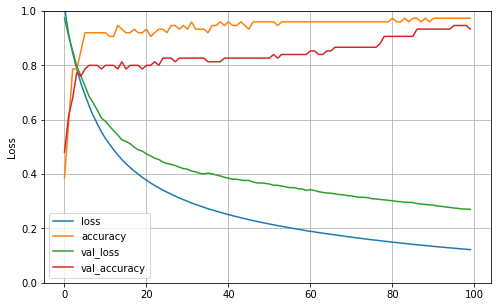

In [52]:
pd.DataFrame(history2.history).plot(figsize=(8, 5),grid=True,ylim=(0,1),ylabel="Loss")
plt.show()

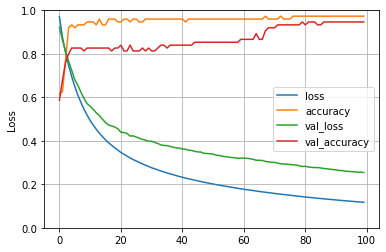

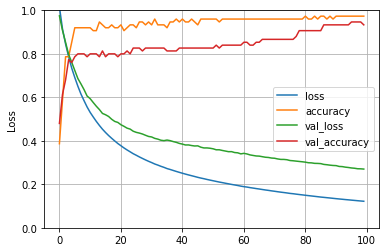

In [53]:
pd.DataFrame(history.history).plot(figsize=(6, 4),grid=True,ylim=(0,1),ylabel="Loss")
pd.DataFrame(history2.history).plot(figsize=(6, 4),grid=True,ylim=(0,1),ylabel="Loss")
plt.show()

I reduced the number of parameters/nodes in the hidden layer from 12 to 9. In general, the final value accuracy is the same as the original model. However, the initial value accuracy of the changed model is worse than the original model (0.4 vs 0.6). Yet, after around 5 epochs, the changed model catches up to the original model's value accuracy (around 0.8). This might show that we don't really need up to 12 parameters in our hidden layers.

#### 16) OK, one more time. This time, copy the same model, but use an SGD optimizer.

In [54]:
inputs = Input(shape=(4,))
layer = Dense(9, activation= 'sigmoid')(inputs)
outputs = Dense(3,activation="softmax")(layer)
model3 = Model(inputs=inputs, outputs=outputs, name="simple_iris_model_3")

In [55]:
from keras.optimizers import SGD

In [56]:
sgd = SGD(lr = 0.03, momentum = 0.5, decay = 0.0, nesterov = False)

In [57]:
model3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
history3 = model3.fit(X_train, y_train, batch_size = 1, verbose = 1, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
75/75 [==============================] - 0s 3ms/step - loss: 1.0663 - accuracy: 0.4933 - val_loss: 0.9722 - val_accuracy: 0.6000
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7636 - accuracy: 0.7467 - val_loss: 0.6469 - val_accuracy: 0.8133
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5518 - accuracy: 0.8800 - val_loss: 0.5283 - val_accuracy: 0.8400
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.9200 - val_loss: 0.4860 - val_accuracy: 0.7867
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.9200 - val_loss: 0.4762 - val_accuracy: 0.8000
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.9067 - val_loss: 0.4328 - val_accuracy: 0.7867
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.9067 - val_loss: 0.3896 - val_accuracy: 0.8400
Epoch 8/100
7

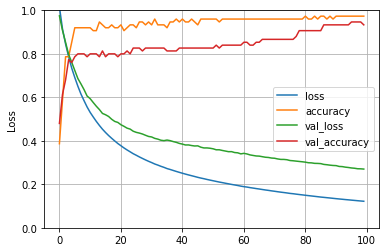

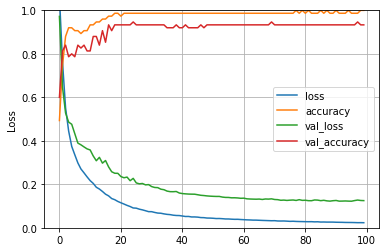

In [59]:
pd.DataFrame(history2.history).plot(figsize=(6, 4),grid=True,ylim=(0,1),ylabel="Loss")
pd.DataFrame(history3.history).plot(figsize=(6, 4),grid=True,ylim=(0,1),ylabel="Loss")
plt.show()

I adjusted the learning rate to be 0.03 and the momentum to be 0.5. I am glad that the learning rate is not too large so that it diverges. With fewer epochs, we are able to reach 80% accuracy, and with only 20 epochs, we reach 93% accuracy. The increased learning rate and momentum make the model arrive at the result faster.

#### 17) Remember, this is a classification problem. Use your model to predict the classes for the test data (using the function predict on the model object itself) and store the results as y_pred.

In [66]:
y_pred = model3.predict(X_test)

#### 18) Notice the structure of y_pred. Remember, softmax generates probabilistic output. So, turn this into a new variable called y_pred_class that predicts the actual class label. 

In [86]:
y_pred_class = [y_test.columns[x] for x in y_pred.argmax(axis = 1)]

#### 19) Finally, using your code from the lab on classification, output the confusion_matrix and the classification_report (from scikit-learn's metric package) to print out the complete performance results. 

In [90]:
y_t = y_test.idxmax(axis=1)

In [91]:
print(classification_report(y_t, y_pred_class))

                    precision    recall  f1-score   support

    species_setosa       1.00      1.00      1.00        23
species_versicolor       0.90      0.86      0.88        22
 species_virginica       0.90      0.93      0.92        30

          accuracy                           0.93        75
         macro avg       0.94      0.93      0.93        75
      weighted avg       0.93      0.93      0.93        75



In [93]:
print(confusion_matrix(y_t, y_pred_class))

[[23  0  0]
 [ 0 19  3]
 [ 0  2 28]]


#### 20) Import the above class into your code. Then write a function called create_keras_model().

In [94]:
from keras.wrappers.scikit_learn import KerasClassifier

In [101]:
def create_keras_model():
    inputs = Input(shape=(4,))
    layer = Dense(9, activation= 'sigmoid')(inputs)
    outputs = Dense(3,activation="softmax")(layer)
    model = Model(inputs=inputs, outputs=outputs, name="simple_iris_model_3")
    sgd = SGD(lr = 0.03, momentum = 0.5, decay = 0.0, nesterov = False)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [102]:
# Create a wrapped keras model
clf = KerasClassifier(build_fn=create_keras_model, verbose=1, epochs=100, batch_size=1)

#### 21) Fit then predict with clf

In [103]:
hist = clf.fit(X_train, y_train)

Epoch 1/100
75/75 [==============================] - 0s 734us/step - loss: 0.8582 - accuracy: 0.6800
Epoch 2/100
75/75 [==============================] - 0s 710us/step - loss: 0.5829 - accuracy: 0.7733
Epoch 3/100
75/75 [==============================] - 0s 811us/step - loss: 0.4767 - accuracy: 0.8533
Epoch 4/100
75/75 [==============================] - 0s 811us/step - loss: 0.3890 - accuracy: 0.8800
Epoch 5/100
75/75 [==============================] - 0s 771us/step - loss: 0.3556 - accuracy: 0.8800
Epoch 6/100
75/75 [==============================] - 0s 718us/step - loss: 0.3088 - accuracy: 0.9067
Epoch 7/100
75/75 [==============================] - 0s 731us/step - loss: 0.2859 - accuracy: 0.9200
Epoch 8/100
75/75 [==============================] - 0s 824us/step - loss: 0.2529 - accuracy: 0.9200
Epoch 9/100
75/75 [==============================] - 0s 798us/step - loss: 0.2334 - accuracy: 0.9200
Epoch 10/100
75/75 [==============================] - 0s 758us/step - loss: 0.2199 - accura

In [105]:
y_pred = clf.model.predict(X_test)

#### 22) Use the predictions to generate a confusion matrix.

In [107]:
y_pred_label = [y_test.columns[x] for x in y_pred.argmax(axis = 1)]

In [109]:
confusion_matrix(y_t, y_pred_label)

array([[23,  0,  0],
       [ 0, 19,  3],
       [ 0,  0, 30]], dtype=int64)

#### 23) Generate a performance report with the classification_report function.

In [110]:
print(classification_report(y_t, y_pred_label))

                    precision    recall  f1-score   support

    species_setosa       1.00      1.00      1.00        23
species_versicolor       1.00      0.86      0.93        22
 species_virginica       0.91      1.00      0.95        30

          accuracy                           0.96        75
         macro avg       0.97      0.95      0.96        75
      weighted avg       0.96      0.96      0.96        75



#### 24) K-Fold

In [111]:
kfold = KFold(n_splits = 5, random_state = 100, shuffle = True)

In [124]:
import time

In [125]:
y_dum = pd.get_dummies(y)

In [142]:
c = 1
df_results = pd.DataFrame(columns = ['pred'])
for train_idx, test_idx in kfold.split(df_iris):
    print(f"Starting Fold #{c}")
    start = time.time()
    clf = KerasClassifier(build_fn=create_keras_model, verbose=0, epochs=100, batch_size=1)
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    y_train = pd.get_dummies(y_train)
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    clf.fit(X_train, y_train)
    y_pred = clf.model.predict(X_test)
    y_pred_label = [y_train.columns[x] for x in y_pred.argmax(axis = 1)]
    df_r = pd.DataFrame({'pred': y_pred_label}, index = test_idx)
    df_results = pd.concat([df_results, df_r])
    print(f"Fold #{c} completed, time elapsed: {time.time() - start} seconds")
    c += 1

Starting Fold #1
Fold #1 completed, time elapsed: 5.1748998165130615 seconds
Starting Fold #2
Fold #2 completed, time elapsed: 4.647606611251831 seconds
Starting Fold #3
Fold #3 completed, time elapsed: 5.8078062534332275 seconds
Starting Fold #4
Fold #4 completed, time elapsed: 5.4247705936431885 seconds
Starting Fold #5
Fold #5 completed, time elapsed: 5.246482849121094 seconds


#### 25) Generate confusion matrix and full classification_report 

In [161]:
df_results = df_results.sort_index() # this index is sorted by the original index order of y, not the observation order made in the original iris dataset
df_results['pred'] = df_results['pred'].apply(lambda x: x[8:])

In [164]:
confusion_matrix(y['species'], df_results['pred'])

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  2, 48]], dtype=int64)

In [165]:
print(classification_report(y['species'], df_results['pred']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.92      0.94        50
   virginica       0.92      0.96      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

